In [1]:
from extractor import *

from algo_spam import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import os.path
from os import path

import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saeny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saeny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saeny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing the datasets

In [2]:
link_datafolder = "./../../../checkdatasets/"

dataset = import_email_data(link_folder=link_datafolder)
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

FileNotFoundError: [Errno 2] File b'./../../../checkdatasets/enronSpamSubset.csv' does not exist: b'./../../../checkdatasets/enronSpamSubset.csv'

# Clean up datasets

In [3]:
train_set = remove_duplicates(train_set, remove_dups=True, print_dups=True)
train_set = remove_missing_vals(train_set, remove_missing=True, print_missing=True)

There are 213 duplicates.
There are:
 Body     0
Label    0
dtype: int64 
 missing values.


In [4]:
# try to reload datasets with extracted features to save up time
force_repickle = False # force to extract features again
pickle_name    = "datasets_optimum_clean"

if path.exists(link_datafolder+pickle_name) and (not force_repickle):
    print("realoading cleaned dataset\n")
    [train_set_clean, 
     test_set_clean] = pickle_data(link_folder=link_datafolder, 
                                    name=pickle_name, operation="rb")
else:
    print("pickling cleaned dataset\n")
    train_set_clean = prep_mails(train_set['Body'])
    test_set_clean = prep_mails(test_set['Body'])
    pickle_data(data_item=[train_set_clean, 
                           test_set_clean], link_folder=link_datafolder, 
                name=pickle_name, operation="wb")

realoading cleaned dataset



# extract features

In [5]:
train_set_copy = train_set # make a copy since we remove outlyers

In [22]:
vectorizer_bow ,train_vec, test_vec =\
create_vectorizer(train_set_clean, test_set_clean, max_features=3000)

[train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)

removing 43 rows



# Perceptron

In [23]:
ppn      = create_perceptron(train_vec, train_set['Label'], eta0=0.3,early_stopping=False, max_iter=100,tol=1e-4)

In [24]:
cv_score = cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5)
print(cv_score.mean())

0.9665206733295542


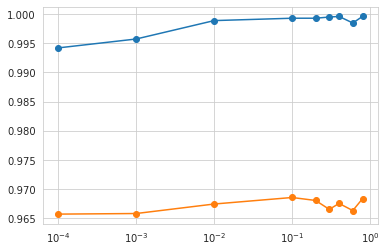

In [25]:
#learning rate
vals      = np.array([1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])
scores    = []
scores_cv = []
for x in vals:
    ppn = create_perceptron(train_vec, train_set['Label'], eta0=x, max_iter=100,tol=1e-4)
    scores.append(ppn.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.semilogx(vals, scores,"o-")
plt.semilogx(vals, scores_cv,"o-")

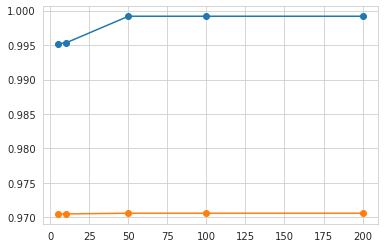

In [31]:
# maximum iterations
import warnings
warnings.filterwarnings('ignore')
vals      = np.array([5, 10, 50, 100, 200])
scores    = []
scores_cv = []
for x in vals:
    ppn = create_perceptron(train_vec, train_set['Label'], eta0=1e-1, max_iter=x,tol=1e-4)
    scores.append(ppn.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.plot(vals, scores,"o-")
plt.plot(vals, scores_cv,"o-")

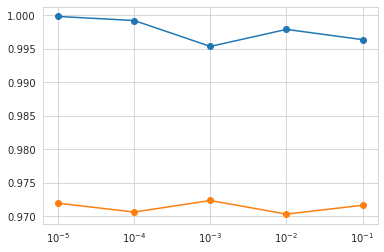

In [32]:
# stopping criterion
import warnings
warnings.filterwarnings('ignore')
vals      = np.array([1e-5,1e-4,1e-3,1e-2,1e-1])
scores    = []
scores_cv = []
for x in vals:
    ppn = create_perceptron(train_vec, train_set['Label'], eta0=1e-1, max_iter=50,tol=x)
    scores.append(ppn.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.semilogx(vals, scores,"o-")
plt.semilogx(vals, scores_cv,"o-")

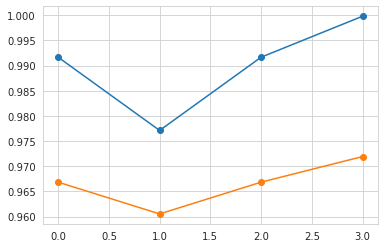

In [34]:
# penalty parameter
vals_names = ["l2","l1","elasticnet","None"]
vals       = [0, 1, 2, 3]
scores    = []
scores_cv = []
for x in vals_names:
    ppn = create_perceptron(train_vec, train_set['Label'], eta0=1e-1, max_iter=50,tol=1e-5, penalty=x)
    scores.append(ppn.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.plot(vals, scores,"o-")
plt.plot(vals, scores_cv,"o-")


removing 28 rows

removing 37 rows

removing 38 rows

removing 43 rows

removing 43 rows

removing 43 rows



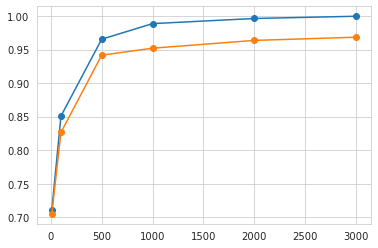

In [36]:
# check for performance with different feature numbers
vals      = [10, 100, 500, 1000, 2000, 3000]
scores    = []
scores_cv = []

for x in vals:
    vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=x)
    [train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)
    ppn = create_perceptron(train_vec, train_set['Label'], eta0=1e-1, max_iter=50, tol=1e-5)
    scores.append(ppn.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.plot(vals, scores,"o-")
plt.plot(vals, scores_cv,"o-")

removing 28 rows

removing 37 rows

removing 38 rows

removing 43 rows

removing 43 rows

removing 43 rows



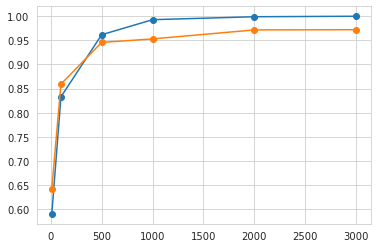

In [37]:
# check for performance with binary features
vals      = [10, 100, 500, 1000, 2000, 3000]
scores    = []
scores_cv = []

for x in vals:
    vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=x)
    [train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)
    train_vec[train_vec>0] = 1
    ppn = create_perceptron(train_vec, train_set['Label'], eta0=1e-1, max_iter=50, tol=1e-5)
    scores.append(ppn.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.plot(vals, scores,"o-")
plt.plot(vals, scores_cv,"o-")

# compare CV and holdout

In [51]:
vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=3000)
[train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)

removing 43 rows



In [54]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
ppn = create_perceptron(train_vec, train_set['Label'], eta0=1e-1, max_iter=50, tol=1e-5)
# percision: Of the spam filter says this email is spam, what’s the probability that it’s spam?
# recall: Of all the spam in the email set, what fraction did the spam filter detect?”
scoring = ['precision_macro', 'recall_macro']
scores_test = cross_validate(ppn, test_vec, test_set['Label'], scoring=scoring, cv=10)
scores_train = cross_validate(ppn, train_vec, train_set['Label'], scoring=scoring, cv=10)
keys = scores_test.keys()
print(keys)

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])


In [56]:
# CV
print("testset")
print(scores_test['test_recall_macro'].mean())
print(scores_test['test_precision_macro'].mean())
print("trainset")
print(scores_train['test_recall_macro'].mean())
print(scores_train['test_precision_macro'].mean())

testset
0.9520539642265744
0.9530925403052478
trainset
0.9688706659141566
0.9690734482720164


In [62]:
# Holdout
from sklearn.metrics import precision_recall_fscore_support
predict_test  = ppn.predict(test_vec)
predict_train = ppn.predict(train_vec)
print("testset")
print(precision_recall_fscore_support(test_set['Label'], predict_test, average='macro'))
print("trainset")
print(precision_recall_fscore_support(train_set['Label'], predict_train, average='macro'))

testset
(0.9728823508371209, 0.9731616049288033, 0.9730205378833293, None)
trainset
(0.9995509794363134, 0.999615206074894, 0.999583048279844, None)


# Random Forrest

In [79]:
vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=2000)
[train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)

removing 43 rows



iteration done
iteration done
iteration done
iteration done
iteration done


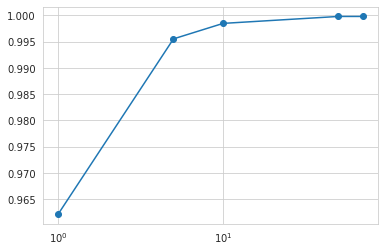

In [81]:
# trees in the forrest
vals      = np.array([1,5,10,50,70])
scores    = []
scores_cv = []
for x in vals:
    print("iteration done")
    dtree = create_rnd_forrest(train_vec, train_set['Label'], random_state=42, n_estimators=x)
    scores.append(dtree.score(train_vec, train_set['Label']))
    #scores_cv.append(cross_val_score(dtree, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.semilogx(vals, scores,"o-")
#plt.semilogx(vals, scores_cv,"o-")

In [100]:
# cost complexity pruning
clfs = []
ccp_alphas = [1e-6, 1e-5, 15e-6, 2e-5, 1e-4, 2e-4, 1e-3]
for ccp_alpha in ccp_alphas:
    clf = RandomForestClassifier(random_state=42, ccp_alpha=ccp_alpha, n_estimators=70)
    clf.fit(train_vec, train_set['Label'])
    clfs.append(clf)

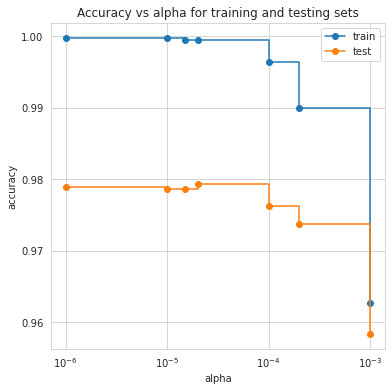

In [101]:
train_scores = [clf.score(train_vec, train_set['Label']) for clf in clfs]
test_scores = [clf.score(test_vec, test_set['Label']) for clf in clfs]

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.semilogx(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.semilogx(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

removing 28 rows

removing 37 rows

removing 38 rows

removing 43 rows

removing 43 rows

removing 43 rows



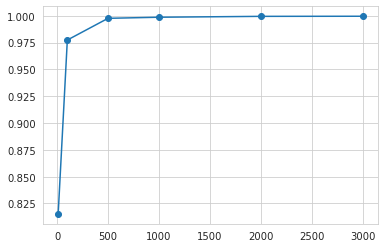

In [98]:
# check for performance with different feature numbers
vals      = [10, 100, 500, 1000, 2000, 3000]
scores    = []
scores_cv = []

for x in vals:
    vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=x)
    [train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)
    dtree = create_rnd_forrest(train_vec, train_set['Label'], random_state=42, ccp_alpha=2e-5, n_estimators=70)
    scores.append(dtree.score(train_vec, train_set['Label']))
    #scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.plot(vals, scores,"o-")
#plt.plot(vals, scores_cv,"o-")

# compare CV and holdout

In [105]:
vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=1000)
[train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)

removing 43 rows



In [106]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
dtree = create_rnd_forrest(train_vec, train_set['Label'], random_state=42, ccp_alpha=2e-5, n_estimators=70)
# percision: Of the spam filter says this email is spam, what’s the probability that it’s spam?
# recall: Of all the spam in the email set, what fraction did the spam filter detect?”
scoring = ['precision_macro', 'recall_macro']
scores_test = cross_validate(dtree, test_vec, test_set['Label'], scoring=scoring, cv=10)
scores_train = cross_validate(dtree, train_vec, train_set['Label'], scoring=scoring, cv=10)
keys = scores_test.keys()
print(keys)

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])


In [107]:
# CV
print("testset")
print(scores_test['test_recall_macro'].mean())
print(scores_test['test_precision_macro'].mean())
print("trainset")
print(scores_train['test_recall_macro'].mean())
print(scores_train['test_precision_macro'].mean())

testset
0.9570359238744015
0.9543936869582982
trainset
0.9636056117192636
0.9615000111893621


In [108]:
# Holdout
from sklearn.metrics import precision_recall_fscore_support
predict_test  = dtree.predict(test_vec)
predict_train = dtree.predict(train_vec)
print("testset")
print(precision_recall_fscore_support(test_set['Label'], predict_test, average='macro'))
print("trainset")
print(precision_recall_fscore_support(train_set['Label'], predict_train, average='macro'))

testset
(0.973020556796985, 0.9748616330495692, 0.9738708196540421, None)
trainset
(0.9983828077327717, 0.9987014981864595, 0.9985410431173731, None)


# Naive Bayes

removing 28 rows

removing 37 rows

removing 38 rows

removing 43 rows

removing 43 rows

removing 43 rows

removing 43 rows

removing 43 rows



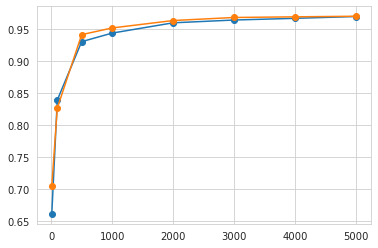

In [110]:
# check for performance with different feature numbers
vals      = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]
scores    = []
scores_cv = []

for x in vals:
    vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=x)
    [train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)
    nb = create_nb(train_vec, train_set['Label'])
    scores.append(nb.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(ppn, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.plot(vals, scores,"o-")
plt.plot(vals, scores_cv,"o-")

In [6]:
vectorizer_bow ,train_vec, test_vec =\
    create_vectorizer(train_set_clean, test_set_clean, max_features=5000)
[train_vec, train_set] = remove_outlyers(train_vec, train_set_copy, threshold=100)

removing 43 rows



iteration done
iteration done
iteration done
iteration done
iteration done
iteration done


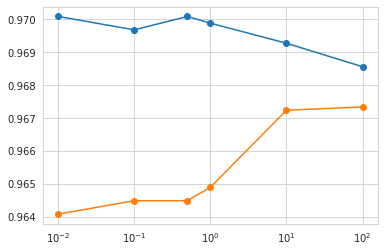

In [9]:
# laplace smoothing parameter
vals      = np.array([1e-2, 1e-1, 0.5, 1, 10, 100])
scores    = []
scores_cv = []
for x in vals:
    print("iteration done")
    nb = create_nb(train_vec, train_set['Label'], alpha=x)
    scores.append(nb.score(train_vec, train_set['Label']))
    scores_cv.append(cross_val_score(nb, train_vec, train_set['Label'],scoring="accuracy", cv=5).mean())
plt.semilogx(vals, scores,"o-")
plt.semilogx(vals, scores_cv,"o-")

# compare CV and holdout

In [10]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
nb = create_nb(train_vec, train_set['Label'], alpha=100)
# percision: Of the spam filter says this email is spam, what’s the probability that it’s spam?
# recall: Of all the spam in the email set, what fraction did the spam filter detect?”
scoring = ['precision_macro', 'recall_macro']
scores_test = cross_validate(nb, test_vec, test_set['Label'], scoring=scoring, cv=10)
scores_train = cross_validate(nb, train_vec, train_set['Label'], scoring=scoring, cv=10)
keys = scores_test.keys()
print(keys)

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])


In [11]:
# CV
print("testset")
print(scores_test['test_recall_macro'].mean())
print(scores_test['test_precision_macro'].mean())
print("trainset")
print(scores_train['test_recall_macro'].mean())
print(scores_train['test_precision_macro'].mean())

testset
0.9283429137040164
0.9460663360941315
trainset
0.9669951559406208
0.966384653606195


In [12]:
# Holdout
from sklearn.metrics import precision_recall_fscore_support
predict_test  = nb.predict(test_vec)
predict_train = nb.predict(train_vec)
print("testset")
print(precision_recall_fscore_support(test_set['Label'], predict_test, average='macro'))
print("trainset")
print(precision_recall_fscore_support(train_set['Label'], predict_train, average='macro'))

testset
(0.9657214389601876, 0.9649618452335302, 0.9653314528405674, None)
trainset
(0.9673737082768784, 0.9682872692339679, 0.9678201861765299, None)
